In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Load data for train Data
Data = pd.read_csv('train.csv')

In [3]:
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape of train data
Data.shape

(1460, 81)

In [5]:
#you can also check the data set information using the info() command. 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


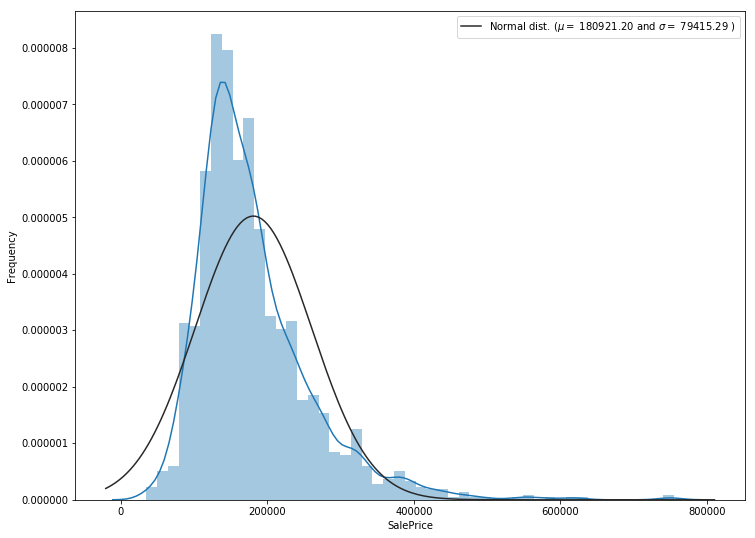

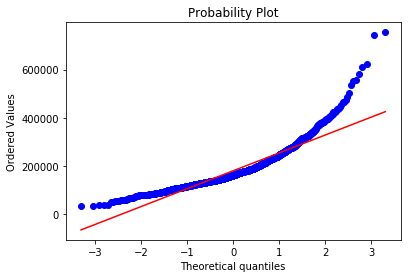

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(Data['SalePrice'], fit=stats.norm)


# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(Data['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(Data['SalePrice'], plot=plt)
plt.show()

In [7]:
 ###target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

In [8]:

#we use log function which is in numpy
train['SalePrice'] = np.log1p(Data['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(Data['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(Data['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

NameError: name 'train' is not defined

In [9]:
#Let's check if the data set has any missing values. 
Data.columns[Data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

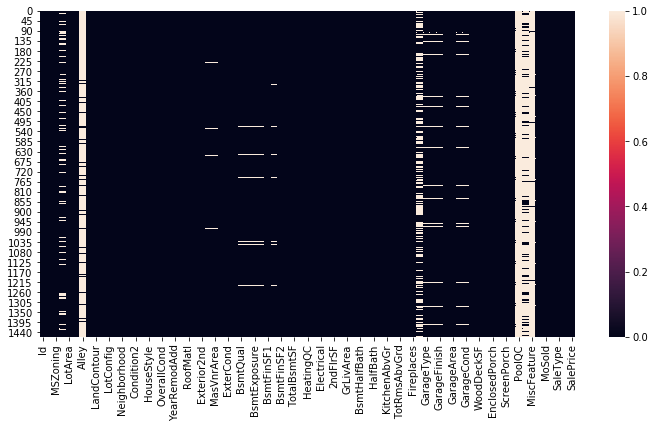

In [10]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(Data.isnull())
plt.show()

In [11]:
#missing value counts in each of these columns
Isnull = Data.isnull().sum()/len(Data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
#Convert into dataframe
Isnull = Isnull.to_frame()   #visualizing missing values

In [13]:
Isnull

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [14]:
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

In [15]:
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageYrBlt,5.547945,GarageYrBlt
GarageType,5.547945,GarageType
GarageFinish,5.547945,GarageFinish


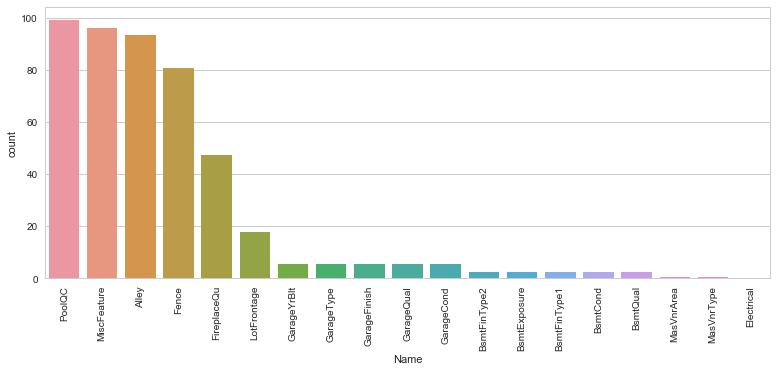

In [16]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [17]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
Data_corr = Data.select_dtypes(include=[np.number])

In [18]:
Data_corr.shape

(1460, 38)

In [19]:
#Delete Id because that is not need for corralation plot
del Data_corr['Id']

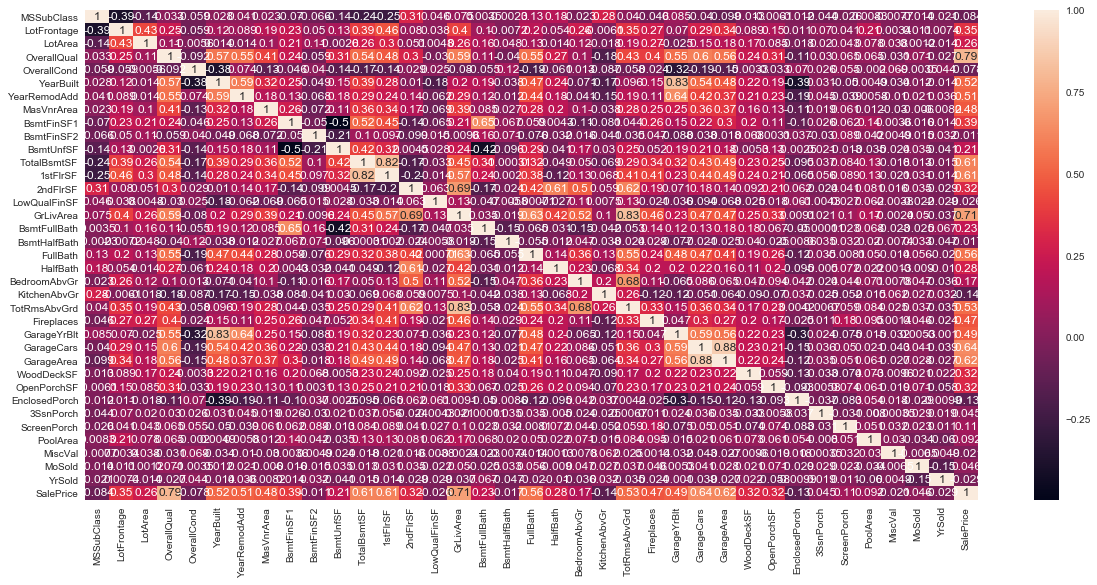

In [20]:
#Coralation plot
corr = Data_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

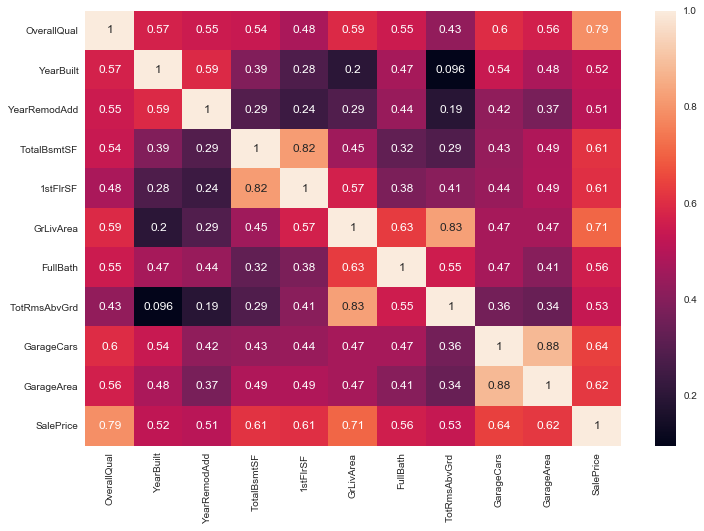

In [21]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]   #Top 50% Corralation train attributes with sale-price
plt.subplots(figsize=(12, 8))
top_corr = Data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [22]:
# From the above visualization we see that OverallQual attribute has highest corelation with the target variable "saleprice"

In [23]:
#unique value of OverallQual
Data.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


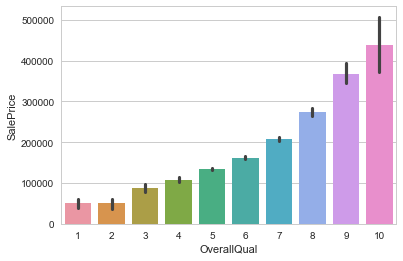

In [24]:
sns.barplot(Data.OverallQual, Data.SalePrice)

In [25]:
print("Finding most important features relative to target")
corr = Data.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Finding most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [26]:
#Imputing Missing Values

In [27]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
Data['PoolQC'] = Data['PoolQC'].fillna('None')

In [28]:
#Arround 50% missing values attributes have been fill by None
Data['MiscFeature'] = Data['MiscFeature'].fillna('None')
Data['Alley'] = Data['Alley'].fillna('None')
Data['Fence'] = Data['Fence'].fillna('None')
Data['FireplaceQu'] = Data['FireplaceQu'].fillna('None')

In [29]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
Data['LotFrontage'] = Data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [30]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']:
    Data[col] = Data[col].fillna('None')

In [31]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    Data[col] = Data[col].fillna(int(0))

In [32]:
#MasVnrArea : replace with zero
Data['MasVnrArea'] = Data['MasVnrArea'].fillna(int(0))

In [33]:
#MasVnrType : replace with None
Data['MasVnrType'] = Data['MasVnrType'].fillna('None')

In [34]:
#There is put mode value 
Data['Electrical'] = Data['Electrical'].fillna(Data['Electrical']).mode()[0]

In [35]:
#There is no need of Utilities
Data = Data.drop(['Utilities'], axis=1)

In [36]:
Data.columns[Data.isnull().any()]   # checking if there are any missing values

Index([], dtype='object')

In [37]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [38]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Data[c].values)) 
    Data[c] = lbl.transform(list(Data[c].values))

In [39]:
#Take targate variable into y
y = Data['SalePrice']

In [40]:
#Delete the saleprice
del Data['SalePrice']

In [41]:
#Take their values in X and y
X = Data.values
y = y.values

In [42]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [43]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [44]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
from sklearn.metrics import r2_score
y_predict = model.predict(X_test)
cm = r2_score(y_test, y_predict)
print(cm)
# Best possible score of r2 is 1.0 it can be negative when the model prediction is worst.


0.8626650707450884


In [54]:
#Prediction
print("Predict value " + str(model.predict([X_test[2]])))
print("Real value " + str(y_test[2]))

Predict value [178056.98122007]
Real value 172785


In [55]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  86.26650707450884


In [56]:
#Train the model Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [57]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import r2_score
y_predict1 = model.predict(X_test)
cm = r2_score(y_test, y_predict1)
print(cm)
# Best possible score of r2 is 1.0 it can be negative when the model prediction is worst.


0.9061278748891141


In [60]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  90.61278748891141
